<a href="https://colab.research.google.com/github/Tanvir007/Land-Use-Land-Cover-GIS-/blob/main/LULC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data science/LULC(new).csv')
df.head

<bound method NDFrame.head of    Bare land  Forest  Grassland  Urban  Water
0       5.45   53.43      17.13   8.66  15.33
1       4.06   52.50      17.59  10.56  15.30
2       5.99   47.42      17.75  13.68  15.17
3       4.44   50.50      14.47  15.95  14.64
4       4.13   50.85      10.54  20.15  14.33
5       4.45   45.02      10.87  23.56  16.09
6       4.77   46.65      11.89  22.04  14.65>

In [ ]:
df.shape

(7, 5)

In [ ]:
df.describe()

,Bare land,Forest,Grassland,Urban,Water
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.755714,49.481429,14.320000,16.371429,15.072857
std,0.715818,3.156588,3.226768,5.755376,0.588748
min,4.060000,45.020000,10.540000,8.660000,14.330000
25%,4.285000,47.035000,11.380000,12.120000,14.645000
50%,4.450000,50.500000,14.470000,15.950000,15.170000
75%,5.110000,51.675000,17.360000,21.095000,15.315000
max,5.990000,53.430000,17.750000,23.560000,16.090000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bare land  7 non-null      float64
 1   Forest     7 non-null      float64
 2   Grassland  7 non-null      float64
 3   Urban      7 non-null      float64
 4   Water      7 non-null      float64
dtypes: float64(5)
memory usage: 408.0 bytes


In [ ]:
x = df.drop(['Urban'],axis = 1)

In [ ]:
x

,Bare land,Forest,Grassland,Water
0,5.45,53.43,17.13,15.33
1,4.06,52.50,17.59,15.30
2,5.99,47.42,17.75,15.17
3,4.44,50.50,14.47,14.64
4,4.13,50.85,10.54,14.33
5,4.45,45.02,10.87,16.09
6,4.77,46.65,11.89,14.65


In [ ]:
y = df.Urban

In [ ]:
y

0     8.66
1    10.56
2    13.68
3    15.95
4    20.15
5    23.56
6    22.04
Name: Urban, dtype: float64

In [ ]:
#import library
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [ ]:

xtest.head()

,Bare land,Forest,Grassland,Water
6,4.77,46.65,11.89,14.65
2,5.99,47.42,17.75,15.17
1,4.06,52.50,17.59,15.30


In [ ]:
ytest.head()

6    22.04
2    13.68
1    10.56
Name: Urban, dtype: float64

In [ ]:
ytrain.head()

3    15.95
0     8.66
5    23.56
4    20.15
Name: Urban, dtype: float64

In [ ]:
xtrain.head()

,Bare land,Forest,Grassland,Water
3,4.44,50.50,14.47,14.64
0,5.45,53.43,17.13,15.33
5,4.45,45.02,10.87,16.09
4,4.13,50.85,10.54,14.33


In [ ]:
ytest

6    22.04
2    13.68
1    10.56
Name: Urban, dtype: float64

In [ ]:
# Predicting the Test set results
pred = regressor.predict(xtest)

In [ ]:
pred

array([22.128206  , 13.80645743, 10.43616947])

In [ ]:
regressor.score(xtest,ytest)

0.9994450835030267

In [ ]:
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

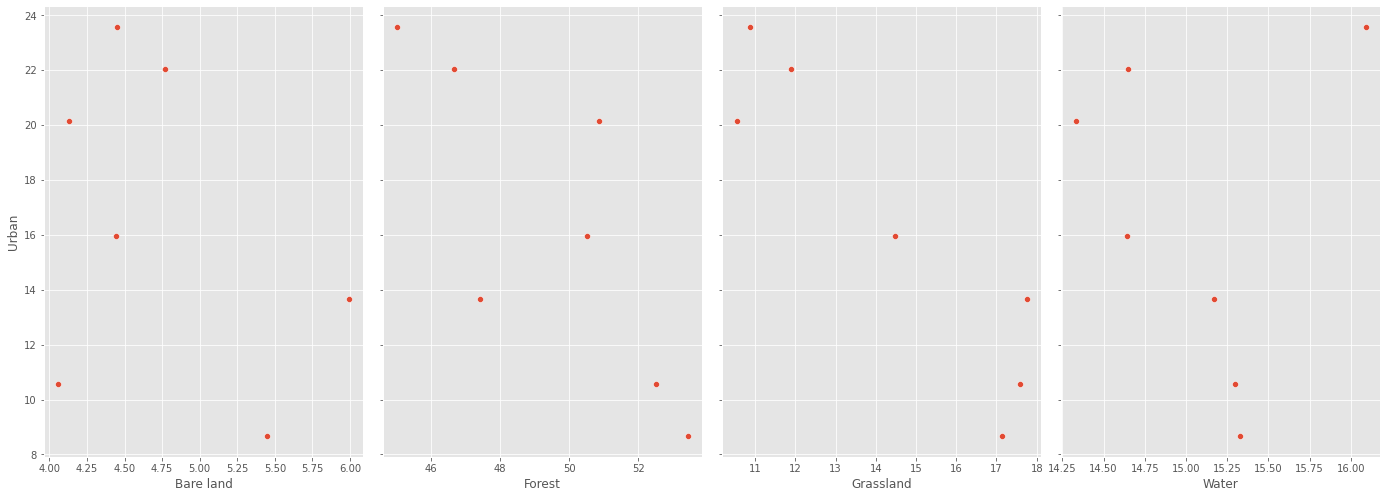

In [ ]:
sns.pairplot(df,x_vars=['Bare land','Forest','Grassland','Water'],y_vars='Urban',height=7,aspect=0.7)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
score=r2_score(ytest,pred)

In [ ]:
score

0.9994450835030267

In [ ]:

print(regressor.intercept_)


101.25835771098234


In [ ]:
print(regressor.coef_)

[-0.90898384 -1.01312541 -1.00321275 -1.06510573]


In [ ]:
list(zip(['Bare land','Forest','Grassland','Water'],regressor.coef_))

[('Bare land', -0.9089838399661065),
 ('Forest', -1.0131254065836728),
 ('Grassland', -1.0032127547106908),
 ('Water', -1.0651057287154133)]

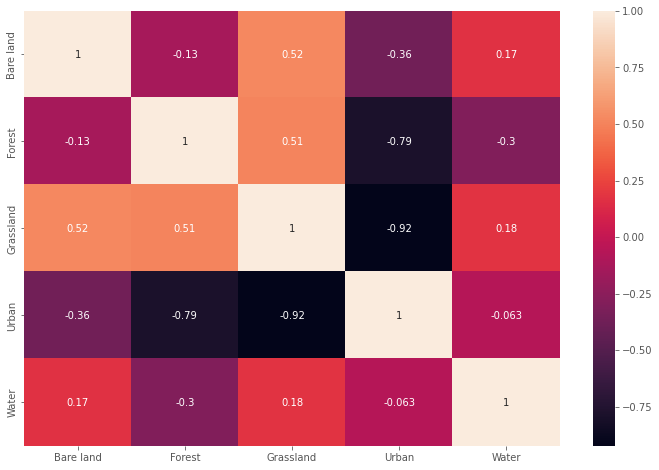

In [ ]:
sns.heatmap(df.corr(),annot=True)

Feature Selection

In [ ]:
from sklearn.metrics import r2_score
lm2=LinearRegression()
lm2.fit(x[['Bare land','Grassland','Water']],y)
lm2_pred=lm2.predict(x[['Bare land','Grassland','Water']])
print(r2_score(y,lm2_pred))

0.8799638838565272


In [ ]:
lm3=LinearRegression()
lm3.fit(x[['Bare land','Forest','Grassland','Water']],y)
lm3_pred=lm3.predict(x[['Bare land','Forest','Grassland','Water']])
print(r2_score(y,lm3_pred))

0.999999789351049


Model Evaluation Using Train/Test Split and Metrics
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

 
Mean Squared Error (MSE) is the mean of the squared errors:
 
Root Mean Squared Error (RMSE) is the mean of the squared errors:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=df.drop('Urban',axis=1)
y=df['Urban']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm4=LinearRegression().fit(x_train,y_train)
lm4_pred=lm4.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm4_pred)))
print("R*2:",r2_score(y_test,lm4_pred))

RMSE: 0.019586456611481555
R*2: 0.9999780436984849


In [ ]:
X=df.drop(['Urban','Water'],axis=1)
y=df['Urban']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm5=LinearRegression().fit(x_train,y_train)
lm5_pred=lm5.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm5_pred)))
print("R*2:",r2_score(y_test,lm5_pred))

RMSE: 1.6326388321334993
R*2: 0.8474445665054464


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


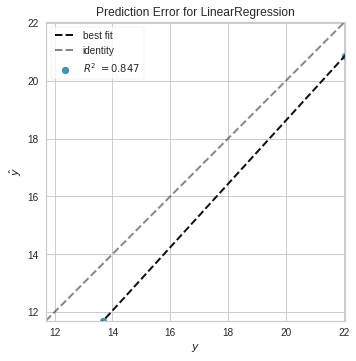

In [ ]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
v=PredictionError(lm5).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

Interaction Effect (Synergy)

In [ ]:
df['interaction']=df['Grassland']*df['Forest']
X=df[['Bare land','Water','interaction']]
y=df['Urban']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm6=LinearRegression().fit(x_train,y_train)
lm6_pred=lm6.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm6_pred)))
print("R*2:",r2_score(y_test,lm6_pred))

RMSE: 3.1244685814429762
R*2: 0.4412728694155189


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


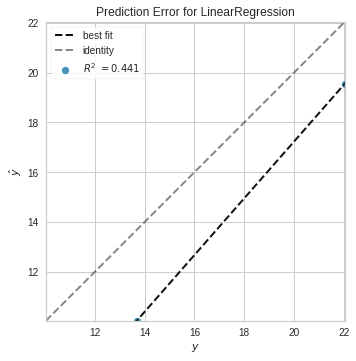

In [ ]:
v=PredictionError(lm6).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()